## Plotting and Analyzing Fulham 0-3 Arsenal 2020-21 in Python

In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

events = pd.read_csv('fulham arsenal.csv')
print(events.shape)
events[['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId','endX', 'endY']].head()

(1648, 99)


,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,type/value,type/displayName,outcomeType/value,outcomeType/displayName,isTouch,playerId,endX,endY
0,2210244067,2,0,0.0,13,0.0,0.0,0,1,FirstHalf,32,Start,1,Successful,False,NaN,NaN,NaN
1,2210244065,2,0,0.0,170,0.0,0.0,0,1,FirstHalf,32,Start,1,Successful,False,NaN,NaN,NaN
2,2210244073,3,0,0.0,170,49.9,50.1,0,1,FirstHalf,1,Pass,1,Successful,True,243076.0,38.6,62.7
3,2210244081,4,0,1.0,170,37.3,64.8,0,1,FirstHalf,1,Pass,1,Successful,True,79583.0,35.3,93.3
4,2210244095,5,0,3.0,170,35.3,93.6,0,1,FirstHalf,1,Pass,1,Successful,True,134331.0,22.2,76.4


In [2]:
#see the main columns descriptions

events[['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId','endX', 'endY']].describe()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,type/value,outcomeType/value,playerId,endX,endY
count,1.648000e+03,1648.000000,1648.000000,1644.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1635.000000,1251.000000,1251.000000
mean,2.210262e+09,471.385316,44.521238,29.405718,86.736650,44.118568,48.445510,45.482403,1.512136,32.742112,0.844053,162781.302141,47.338689,50.140048
std,3.109335e+04,600.127255,27.645835,17.368450,78.379131,24.365013,30.207988,28.507154,0.833336,492.095857,0.362915,96837.071302,23.144313,30.031298
min,2.210229e+09,1.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29463.000000,2.500000,0.000000
25%,2.210251e+09,221.000000,19.750000,15.000000,13.000000,25.675000,21.775000,19.750000,1.000000,1.000000,1.000000,89401.000000,29.200000,24.100000
50%,2.210257e+09,443.500000,43.000000,30.000000,13.000000,42.250000,48.500000,43.000000,1.000000,1.000000,1.000000,134331.000000,45.700000,49.400000
75%,2.210265e+09,665.250000,67.000000,44.000000,170.000000,63.025000,74.200000,69.000000,2.000000,3.000000,1.000000,256125.000000,64.800000,76.300000
max,2.210546e+09,11685.000000,92.000000,59.000000,170.000000,99.600000,100.000000,94.000000,16.000000,10000.000000,1.000000,349561.000000,100.000000,100.000000


## Coordinate system convertion and adaptation

In [3]:
#convert the existing coordinate columns to the relevant format

events['newX'] = events['x'] / 100
events['newY'] = events['y'] / 100
events['newendX'] = events['endX'] / 100
events['newendY'] = events['endY'] / 100

events[['newX', 'newY', 'newendX', 'newendY']].describe()

,newX,newY,newendX,newendY
count,1648.000000,1648.000000,1251.000000,1251.000000
mean,0.441186,0.484455,0.473387,0.501400
std,0.243650,0.302080,0.231443,0.300313
min,0.000000,0.000000,0.025000,0.000000
25%,0.256750,0.217750,0.292000,0.241000
50%,0.422500,0.485000,0.457000,0.494000
75%,0.630250,0.742000,0.648000,0.763000
max,0.996000,1.000000,1.000000,1.000000


In [4]:
#now convert and adapt the coordinate system to our functions and pitch viz
#https://www.youtube.com/watch?v=8TrleFklEsE&t=1197s from 10:50

def to_metric_coordinates(data,field_dimen=(106.,68.) ):
    x_columns = [c for c in data.columns if c[-1].lower()=='x']
    y_columns = [c for c in data.columns if c[-1].lower()=='y']
    data[x_columns] = ( data[x_columns]-0.5 ) * field_dimen[0]
    data[y_columns] = ( data[y_columns]-0.5 ) * field_dimen[1]
    
events = mio.to_metric_coordinates(events)
events.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,satisfiedEventsTypes/15,satisfiedEventsTypes/16,satisfiedEventsTypes/17,satisfiedEventsTypes/18,satisfiedEventsTypes/19,satisfiedEventsTypes/20,newX,newY,newendX,newendY
0,2210244067,2,0,0.0,13,-53.0,34.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,-53.000,34.000,NaN,NaN
1,2210244065,2,0,0.0,170,-53.0,34.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,-53.000,34.000,NaN,NaN
2,2210244073,3,0,0.0,170,5236.4,-3372.8,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.106,-0.068,-12.084,-8.636
3,2210244081,4,0,1.0,170,3900.8,-4372.4,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,-13.462,-10.064,-15.582,-29.444
4,2210244095,5,0,3.0,170,3688.8,-6330.8,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,-15.582,-29.648,-29.468,-17.952


In [28]:
events['newX'] = -1*(events['newX'])
events['newendX'] = -1*(events['newendX'])

In [29]:
events[['newX', 'newY', 'newendX', 'newendY']].describe()

,newX,newY,newendX,newendY
count,1648.000000,1648.000000,1648.000000,1648.000000
mean,6.234318,1.057053,2.141419,-0.072291
std,25.826914,20.541432,21.406687,17.790672
min,-52.576000,-34.000000,-53.000000,-34.000000
25%,-13.806500,-16.456000,-9.116000,-12.002000
50%,8.215000,1.020000,0.000000,0.000000
75%,25.784500,19.193000,16.112000,11.798000
max,53.000000,34.000000,50.350000,34.000000


In [30]:
#now filtering out all the 3 goals

home_events = events[events['teamId'] == 170].copy() #fulham
away_events = events[events['teamId'] == 13].copy() #arsenal
away_goals = away_events[away_events['type/displayName']=='Goal'].copy()
away_goals[['newX', 'newY', 'newendX', 'newendY']].head()

,newX,newY,newendX,newendY
180,-50.244,2.040,0.0,0.0
907,-47.594,1.224,0.0,0.0
1023,-39.432,-9.248,0.0,0.0


## All three goals Viz

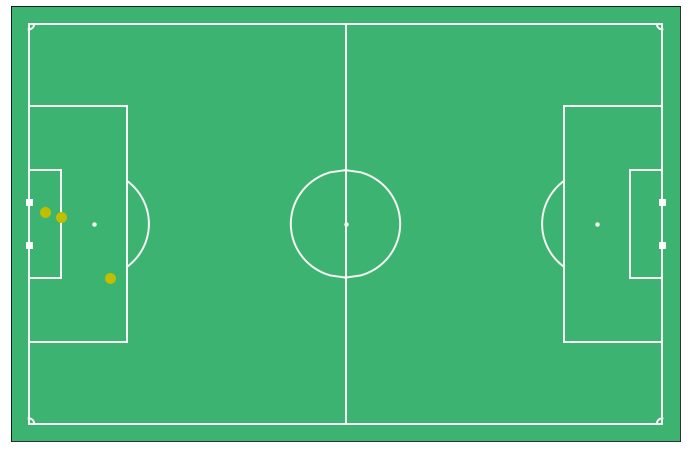

In [31]:
#plotting the pitch
fig,ax = mviz.plot_pitch()

#Plotting the first goal 
ax.plot(events.loc[180]['newX'], events.loc[180]['newY'], 'yo', color='y',  markersize=10, alpha=1)
#ax.annotate("GOAL", xytext=(events.loc[180][['newX','newY']]), xy=events.loc[180][['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

#Plotting the second goal 
ax.plot(events.loc[907]['newX'], events.loc[907]['newY'], 'yo', color='y', markersize=10, alpha=1)
#ax.annotate("GOAL", xytext=events.loc[907][['newX','newY']], xy=events.loc[907][['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

#Plotting the third goal 
ax.plot(events.loc[1023]['newX'], events.loc[1023]['newY'], 'yo', color='y', markersize=10, alpha=1)
#ax.annotate("GOAL", xytext=events.loc[1023][['newX','newY']], xy=events.loc[1023][['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

## Exploring further

{
   "playerIdNameDictionary": {
      "29463": "Willian",
      "44120": "Pierre-Emerick Aubameyang",
      "68335": "Denis Odoi",
      "73078": "Alexandre Lacazette",
      "79583": "Tom Cairney",
      "85006": "Tim Ream",
      "86794": "Anthony Knockaert",
      "89401": "Granit Xhaka",
      "91840": "Michael Hector",
      "92173": "Bernd Leno",
      "92516": "Alphonse Areola",
      "94933": "Neeskens Kebano",
      "110260": "Sead Kolasinac",
      "115279": "Aleksandar Mitrovic",
      "125209": "Mohamed Elneny",
      "125211": "Héctor Bellerín",
      "134111": "Cyrus Christie",
      "134331": "Joe Bryan",
      "134332": "Bobby De Cordova-Reid",
      "135724": "Harrison Reed",
      "136455": "Josh Onomah",
      "137386": "Ivan Cavaleiro",
      "144890": "Dani Ceballos",
      "236523": "Maxime Le Marchand",
      "239872": "Nicolas Pépé",
      "243076": "Aboubakar Kamara",
      "254550": "Matt Macey",
      "255169": "Ainsley Maitland-Niles",
      "256125": "Marek Rodák",
      "288795": "Rob Holding",
      "297403": "Kieran Tierney",
      "334087": "Gabriel Magalhães",
      "342563": "Joseph Willock",
      "345845": "Eddie Nketiah",
      "349561": "André-Frank Zambo Anguissa",
      "367185": "Bukayo Saka"
   }

Now let's see the events type breakdown for both teams. Fulham is home the home team. Arsenal is the away team.

In [9]:
home_events['type/displayName'].value_counts()

Pass               560
BallRecovery        46
BallTouch           28
Foul                24
Aerial              13
TakeOn              12
Clearance           11
Tackle              11
Interception        10
Save                 6
Dispossessed         6
Challenge            6
CornerAwarded        5
BlockedPass          5
KeeperPickup         4
SavedShot            3
SubstitutionOn       3
End                  3
SubstitutionOff      3
MissedShots          2
OffsidePass          2
Card                 2
OffsideProvoked      2
Start                2
OffsideGiven         2
Error                1
FormationSet         1
KeeperSweeper        1
Name: type/displayName, dtype: int64

In [10]:
away_events['type/displayName'].value_counts()

Pass               666
BallRecovery        42
Foul                24
Interception        18
BallTouch           16
Aerial              13
Tackle              12
Clearance           11
TakeOn              10
Dispossessed         8
Challenge            6
SavedShot            6
CornerAwarded        5
BlockedPass          4
SubstitutionOn       3
MissedShots          3
SubstitutionOff      3
KeeperPickup         3
End                  3
Save                 3
Goal                 3
OffsidePass          2
OffsideGiven         2
Card                 2
Start                2
OffsideProvoked      2
ShotOnPost           1
FormationSet         1
Name: type/displayName, dtype: int64

In [11]:
events = events.fillna(0)
events.playerId = events.playerId.astype(int)

#events['playerId'] = pd.to_numeric(events['playerId'])
#events['playerId'] = events['playerId'].astype(int)
events['playerId'].value_counts()

334087    132
288795    115
297403    106
79583      92
91840      89
85006      86
135724     84
125211     81
68335      78
125209     76
89401      75
134331     75
44120      55
137386     55
255169     55
29463      45
94933      44
73078      43
92173      41
136455     38
243076     37
256125     34
349561     30
144890     25
239872     17
0          13
134332     13
115279     12
345845      2
Name: playerId, dtype: int64

Gabriel has the ID number of 334087. He is the one who made the most number of passes. Which is understandable as he is one of the central defenders, and Arsenal under Arteta passes a lot around the GK area. Obviously, the majority of these 132 passes were not progressive.

## Plotting Willian's passes and assists

Willian made 2 assits in this match, and had a great match overall so let's go ahead and visualize his passes.

In [12]:
willian_events = events[events['playerId'] == 29463].copy()
willian_events.shape

(45, 103)

In [38]:
##visualizing willian's passes

willian_events_main = willian_events[['id', 'eventId', 'minute', 'second', 'teamId',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId', 'newX', 'newY', 'newendX', 'newendY']].copy()

willian_events_passes = willian_events_main[willian_events_main['type/displayName']=='Pass'].copy()

print(willian_events_passes.shape)
willian_events_passes[['newX', 'newY', 'newendX', 'newendY', 'outcomeType/value', 'outcomeType/displayName']].head(30)


(30, 18)


,newX,newY,newendX,newendY,outcomeType/value,outcomeType/displayName
17,-3.286,9.044,4.028,8.024,1,Successful
21,-6.360,-0.884,-19.504,-29.376,1,Successful
169,-17.172,-10.948,-8.798,-20.400,1,Successful
201,31.058,-0.204,36.570,-6.120,1,Successful
225,5.512,23.596,13.886,30.804,1,Successful
255,11.236,11.764,-7.314,-14.756,1,Successful
293,15.688,4.896,10.388,30.872,1,Successful
315,-42.082,17.884,-43.778,15.776,0,Unsuccessful
319,-29.362,29.376,-23.002,27.200,1,Successful
326,-14.204,32.096,-45.368,18.292,1,Successful


[]

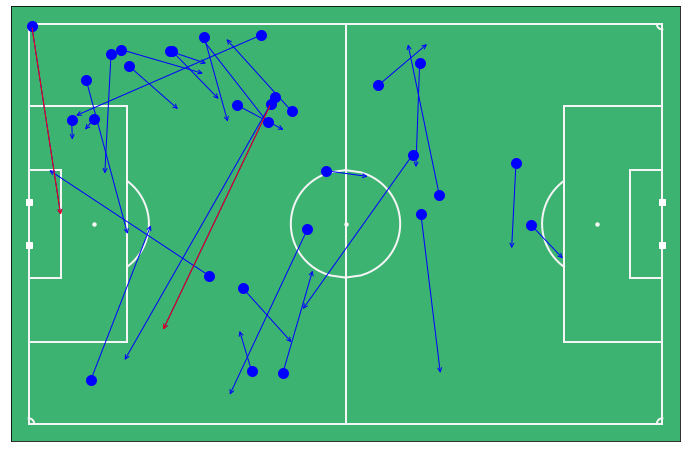

In [39]:
fig,ax = mviz.plot_pitch()

def do_irreversible_thing(x):
    ax.plot((x.newX), (x.newY), 'yo', color='b',  markersize=10, alpha=1)
    ax.annotate("", xytext=(x[['newX','newY']]), xy=x[['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))
    
willian_events_passes.apply(do_irreversible_thing, axis=1)

#making the ones that ended up being assits with red
ax.annotate("", xytext=(willian_events_passes.loc[904][['newX','newY']]), xy=willian_events_passes.loc[904][['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))
ax.annotate("", xytext=(willian_events_passes.loc[1022][['newX','newY']]), xy=willian_events_passes.loc[1022][['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

ax.plot()

## Plotting the passes that lead to the Auba goal assisted by Willian

In [16]:
events_leading_to_third_goal = events.loc[1012:1022].copy()
events_leading_to_third_goal['type/displayName']

only_passes_booelan_filter = events_leading_to_third_goal["type/displayName"].isin(["Pass"]) 
passes_leading_to_third_goal = events_leading_to_third_goal[only_passes_booelan_filter]

passes_leading_to_third_goal['type/displayName']

1012    Pass
1013    Pass
1014    Pass
1015    Pass
1016    Pass
1017    Pass
1018    Pass
1019    Pass
1020    Pass
1022    Pass
Name: type/displayName, dtype: object

Text(-39.432, -9.248000000000001, 'GOAL')

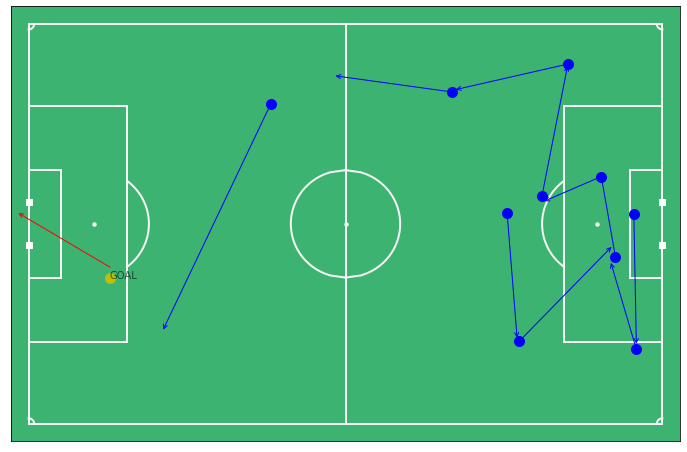

In [17]:
fig,ax = mviz.plot_pitch()

def do_irreversible_thing(x):
    ax.plot((x.newX), (x.newY), 'yo', color='b',  markersize=10, alpha=1)
    ax.annotate("", xytext=(x[['newX','newY']]), xy=x[['newendX','newendY']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))
    
passes_leading_to_third_goal.apply(do_irreversible_thing, axis=1)
ax.plot()

ax.plot(events.loc[1023]['newX'], events.loc[1023]['newY'], 'yo', color='y',  markersize=10, alpha=1)
ax.annotate("GOAL", xytext=(events.loc[1023][['newX','newY']]), xy=(-55,2), alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))